# predicting numbers in image with logistic regression

### loading libraries

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

### loading data

In [37]:
digits = load_digits()


### determining the total number of images and labels

In [38]:
print('Image Data shape',digits.data.shape)
print('Label Data shape',digits.target.shape)

Image Data shape (1797, 64)
Label Data shape (1797,)


### displaying some of the images and labels

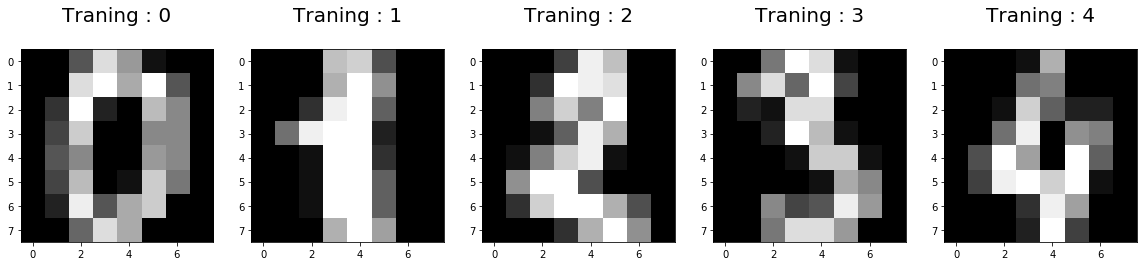

In [39]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Traning : %i\n' %label,fontsize=20)

### splitting data into trining and testing sets

In [40]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.25,random_state=2)

### loading the model

In [41]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### making prediction of our first element of test set

In [42]:
print(log_reg.predict(X_test[0].reshape(1,-1)))

[4]


### predicting output of first 10 elements of test set

In [43]:
print(log_reg.predict(X_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


### predicted output of test set

In [44]:
preds = log_reg.predict(X_test)

### determining the accuracy of the model

In [45]:
score = log_reg.score(X_test,y_test)
print(score)

0.9466666666666667


### representing the confusion_matrix as heatmap

In [48]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


Text(0.5,1,'Accuracy Score : 0.9466666666666667')

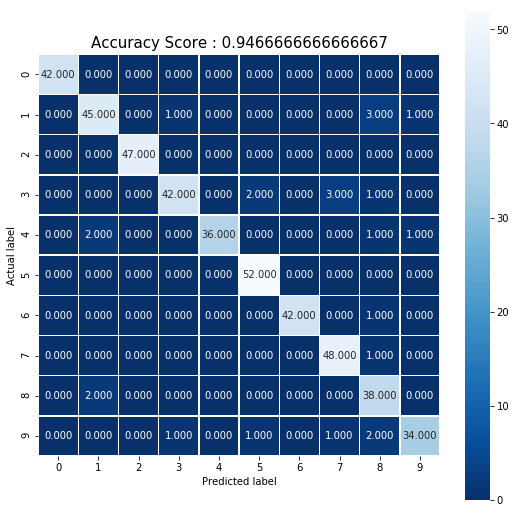

In [49]:

plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=0.5,square = True,cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size=15)

### printing out sample correct outputs

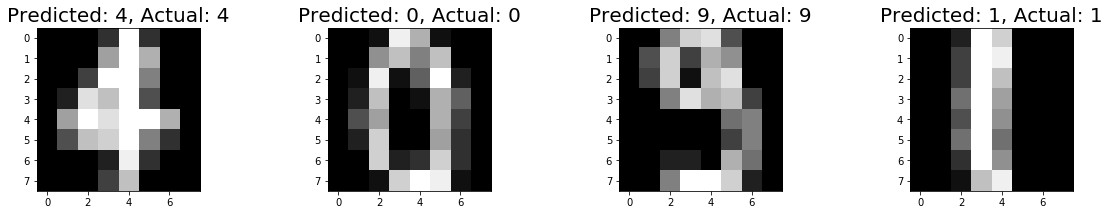

In [50]:
index = 0
classifiedIndex = []
for predict,actual in zip(preds,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds[wrong],y_test[wrong]),fontsize=20)